# EE 596 Summer HW3: NEWS RECOMMENDATION

**We use MIcrosoft News Dataset (MIND)** is a large-scale dataset for news recommendation research. It was collected from anonymized behavior logs of Microsoft News website. The mission of MIND is to serve as a benchmark dataset for news recommendation and facilitate the research in news recommendation and recommender systems area.

MIND contains about **160k English news** articles and **more than 15 million impression logs** generated by **1 million users**.

# Content Of The File :
1. <a href='#1'> Importing The Packages </a>
2. <a href='#2'> Importing The Data </a>
3. <a href='#3'>Having a look at the data</a>
4. <a href='#4'>Selecting Columns</a>
5. <a href='#5'>Visualizing The data</a>  <ol>
    <li> <a href='#5.1'>Category and Subcategory distribution in the data</a></li>
    <li> <a href='#5.2'>WordClouds For Sports</a></li>
    <li> <a href='#5.3'>Wordcloud For News</a></li>
    <li> <a href='#5.4'>Title Length Distribution per Category</a></li></ol>

6. <a href='#6'>Data Preprocessing</a> <ol>
    <li> <a href='#6.1'>Checking and removing all the duplicate values</a></li>
    <li> <a href='#6.2'>Checking for NaN values</a></li>
    <li> <a href='#6.3'>Getting Titles with more than 4 words</a></li></ol>

<a id='1'></a>
# Importing The Packages

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline
# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from lightgbm import LGBMClassifier
from sklearn.metrics import pairwise_distances
import copy
from IPython.display import clear_output
from eli5.lime import TextExplainer
import warnings
from eli5.lime.samplers import MaskingTextSampler
from re import sub
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plotly.offline.init_notebook_mode (connected = True)
import eli5
from eli5.lime import TextExplainer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from PIL import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import random
warnings.filterwarnings("ignore")

<a id='2'></a>
# Importing the data

In [2]:
data=pd.read_csv('news.tsv',header=None,sep='\t')

In [3]:
data.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

<a id='3'></a>
# Having a look at the data

In [4]:
data.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


<a id='4'></a>
# Selecting the needed columns

In [5]:
data=data.iloc[:,:5]

In [6]:
data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."


<a id='5'></a>
# Visualizing The Data

<a id='5.1'></a>
# Category and Subcategory distribution in data

In [7]:
c=data[['Category','SubCategory']].value_counts()

In [8]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [9]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [10]:
px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')

### From this we can clearly see that the most of the news was on the Category of news with subcategory newsus followed by sports with football news

<a id='5.2'></a>
# WordCloud For Sports News

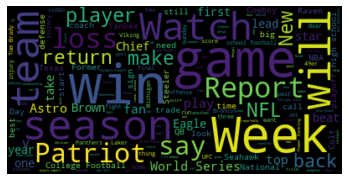

In [11]:
text=' '
for i in data[data['Category']=='sports']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


<a id='5.3'></a>
# Wordcloud for news

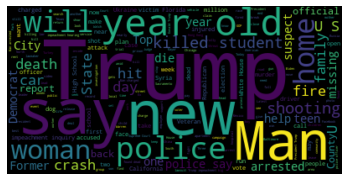

In [12]:
text=' '
for i in data[data['Category']=='news']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


Wow the main attraction of news has been Trump :)

<a id='5.4'></a>
# Histogram For Title Length

In [13]:
t=[]
for i in data['Title']:
    t.append(len(i))
px.histogram(t,color=data['Category'])

Well most of the titles are in the range of 50 to 100 words :) So if you are gonna write a news article keep the title in 50 - 100 words :)

<a id='6'></a>
# Data Preprocessing

<a id='6.1'></a>
## Checking and removing all the duplicate values

In [14]:
print('the number of articles before processing :',len(data))
data.drop_duplicates(subset=['Title'],inplace=True)
print('The number of articles after processing :',len(data))

the number of articles before processing : 51282
The number of articles after processing : 50434


<a id='6.2'></a>
## Checking for NaN values

In [15]:
data.isna().sum()

News ID           0
Category          0
SubCategory       0
Title             0
Abstract       2646
dtype: int64

<AxesSubplot:>

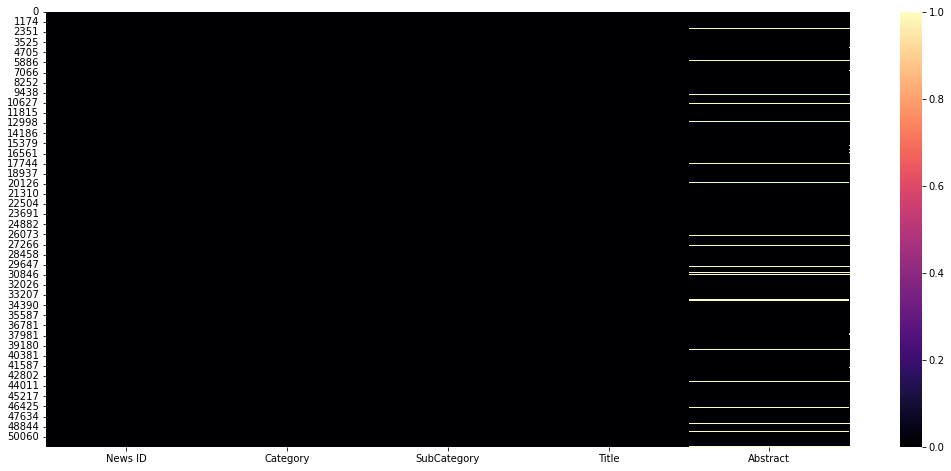

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(data.isnull(), cbar=True, cmap='magma')


In [17]:
data.dropna(inplace=True)

<a id='6.3'></a>
## Getting Titles with more than 4 words

In [18]:
print('the number of articles before processing :',len(data))
data=data[data['Title'].apply((lambda x: len(x.split())>=4))]
print('The number of articles after processing :',len(data))

the number of articles before processing : 47788
The number of articles after processing : 47661


In [19]:
df2=data.copy()

<a id='10'></a>
# Let's Make A Category Recommendation System
use your X and Y data

In [28]:
##TODO: